In [2]:
pip install pandas
pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id','market_cap_usd']]

# Counting the number of values
print(market_cap_raw.count())

In [5]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd /cap.market_cap_usd.sum())*10)

# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

In [ ]:
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE, logy = True, color=COLORS)
ax.set_xlabel('')
ax.set_ylabel('USD')

In [16]:
volatility = dec6[["id", "percent_change_24h", "percent_change_7d"]]
volatility =  volatility.set_index('id').dropna()

In [ ]:
volatility = volatility.sort_values('percent_change_7d')
volatility.head()

In [ ]:
def top10_subplot(volatility_series, title):
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    ax = volatility_series[:10].plot.bar(color = "darkred", ax=axes[0])
    fig.suptitle(title)
    ax.set_ylabel("% change")
    ax = volatility_series[-10:].plot.bar(color = "darkblue", ax=axes[1])
    ax.set_ylabel("% change")
    return fig,ax

DTITLE = "24 hours top losers and winners"
fig,ax = top10_subplot(volatility.percent_change_24h, DTITLE)    

In [ ]:
volatility7d = volatility.sort_values('percent_change_7d')
WTITLE = "Weekly top losers and winners"
fig,ax = top10_subplot(volatility7d.percent_change_7d,WTITLE)


In [ ]:
largecaps = cap.query('market_cap_usd > 100000000')
largecaps

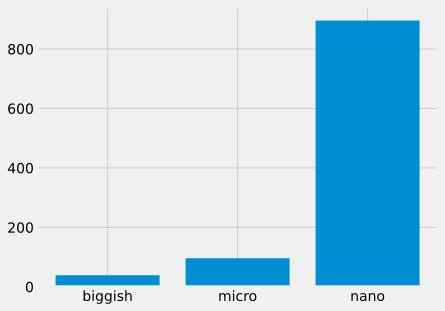

In [31]:
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the not_so_small cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS);